<a href="https://colab.research.google.com/github/abbycakes02/Perceptron/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
#n_samples=300 specifically 300 samples seperated equally amongst 2 clusters(because centers=2)
#n_features=2 because easy to visualize a line instead of hyperplane that seperates + from - examples
#cluster_std equals st. dev. of clusters
# when randomness is included in ds project we have to specify random state/random seed so result is replicable
X,y = datasets.make_blobs(n_samples=300,n_features=2,centers=2,cluster_std=1.6,random_state=2)
print(X)
print(y)

[[-1.28008634e+00 -8.61371125e+00]
 [-3.64616044e-01 -7.63088711e-01]
 [ 1.67647749e+00 -6.42371749e-01]
 [ 5.08516816e-01 -9.92026271e+00]
 [ 2.30506574e+00 -2.30334204e+00]
 [-5.79159509e-01  2.04514022e+00]
 [-5.17573008e+00 -9.30111296e+00]
 [ 1.53422890e-01 -2.23724604e+00]
 [-1.57331248e+00 -7.84970780e+00]
 [ 5.78332428e-01 -8.86375049e+00]
 [-2.68507459e+00 -9.73177004e+00]
 [ 2.32091203e+00 -7.55846625e-01]
 [-2.05286427e+00 -3.21057675e+00]
 [ 6.99846781e-01 -3.14924318e+00]
 [ 1.89357738e+00 -2.22486536e+00]
 [-4.77130426e-01 -1.08322173e+01]
 [-4.24074832e+00 -8.95269446e+00]
 [-4.17608644e-01 -1.04353309e+01]
 [ 3.64993881e-01 -1.06364829e+01]
 [-1.76664026e+00 -5.34500357e+00]
 [ 2.00983157e+00  2.07001468e+00]
 [ 1.82352944e+00 -2.08234401e+00]
 [ 3.57753159e+00 -6.12582210e-01]
 [ 1.82702465e+00 -2.42666316e+00]
 [ 2.62319683e+00  2.39025311e+00]
 [ 4.64531298e+00 -2.08679830e+00]
 [ 2.33343483e+00 -1.50424399e+00]
 [-5.85261906e-01  1.17610599e+00]
 [-2.01931051e+00 -8

In [4]:
#we want to use the sign function as our activation function, therefore we must encode classlabels of 0 as -1
y[y==0] = -1
y

array([-1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,
        1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,
        1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1,
       -1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
        1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,
        1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1, -1,  1, -1

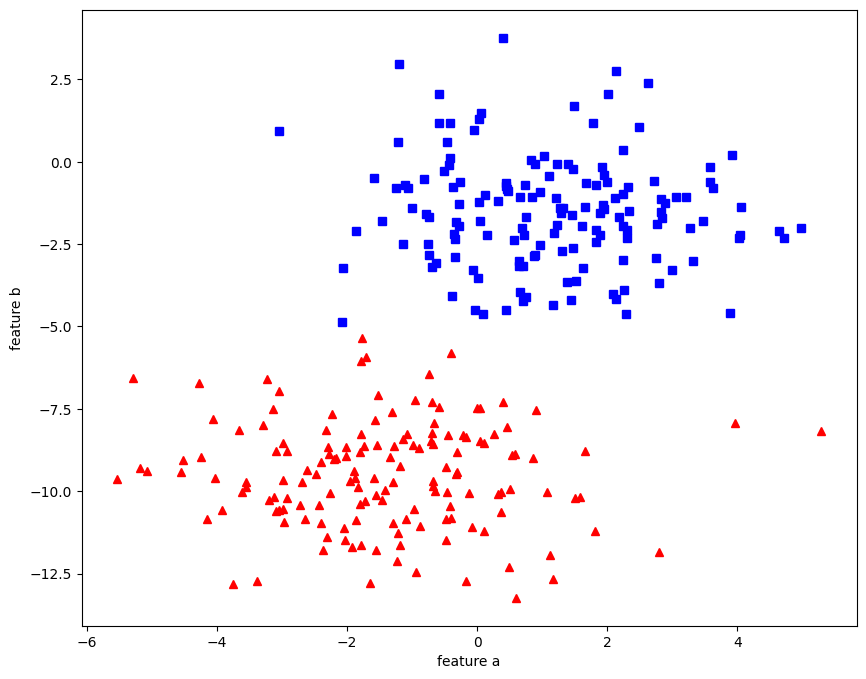

In [5]:
figure = plt.figure(figsize=(10,8))
#plot all the examples in the first cluster using a red triangle
plt.plot(X[:,0][y==-1],X[:,1][y==-1],"r^")
#plot all the examples in the secon cluster using blue squares
plt.plot(X[:,0][y==1],X[:,1][y==1],"bs")
#make x label for the x axis
plt.xlabel("feature a")
plt.ylabel("feature b")
plt.show()


In [6]:
import numpy as np
#define activation function
def activation(z):
  return np.sign(z)

In [7]:
from abc import ABC, abstractmethod

class Classifier(ABC):
  @abstractmethod
  def fit(self,X_train,y_train):
    pass
  def predict(self,X_test):
    predict_list = []
    for example in X_test:
      prediction = self.predict_example(example)
      predict_list.append(prediction)
    return np.array(predict_list)
  @abstractmethod
  def predict_example(self,X_example):
    pass


In [10]:
class Perceptron(Classifier):
  # lr and max_epochs are hyperparameters that could possibly be altered to improve the performance of our perceptron
  #lr= learning rate defines how big our steps are in gradient descent
  #max_epochs=maximum num of epochs to do in training
  #epoch = one pass over the training data/one training episode
  #weight_0 = determines whether the weights will be initialized all to 0 or will be initalized by sampling a standard normal distribution

  def __init__(self,lr=0.1, max_epochs=500,weight_0=True):
    self.w = None
    self.lr = lr
    self.max_epochs = max_epochs
    self.weight_0 = weight_0
  def predict(self, X_test):
    bias_input = np.ones((X_test.shape[0],1))
    X_test = np.concatenate((X_test, bias_input), axis = 1)
    super().predict(X_test)
  def fit(self,X_train,y_train):
    bias_input = np.ones((X_train.shape[0],1))
    X_train = np.concatenate((X_train, bias_input), axis = 1)
    if self.weight_0:
      #initialize all weights to zero
      self.w = np.zeros(X_train.shape[1])
    else:
      #initalize all weights by sampling from standard normal distribution
      self.w = np.random.randn(X_train.shape[1])
    converge = False
    epochs = 0
    while not converge and epochs<self.max_epochs:
      converge = True
      epochs+=1
      for x,y_label in zip(X_train,y_train):
        #this will only be executed if we have misclassified an example
        if y_label * np.dot(self.w.T, x)<= 0:
          #update weight vector to minimize error by adjusting weights in the correct direction
          converge=False
          self.w+=self.lr * y_label * x
    if converge:
      print(f"converged in {epochs} epochs")
    else:
      print(f'terminated training after failing to converge in {self.max_epochs} epochs')
    self.plot_boundary(X_train,y_train)
  def predict_example(self,X_example):
    #take sign of dot product of weights times the example
    return activation(np.dot(self.w.T, X_example))
  def plot_boundary(self,X,y):
    #creating scatter plot of training points
    #c = y means + or -
    plt.scatter(X[:,0], X[:,1], c = y)
    if self.w[1]!= 0:
      #calculate the slope and intercept of decision boundary line
      slope = -self.w[0]/self.w[1]
      intercept = -self.w[2]/self.w[1]

      x = np.linspace(np.min(X[:,0]),np.max(X[:,0]))
      y = slope * x + intercept
      plt.plot(x,y,"r-")
    else:
      x = -self.w[2]/self.w[0]
      plt.axvline(x,color="r")
    plt.xlabel("feature a")
    plt.ylabel("feature b")
    plt.show()



converged in 4 epochs


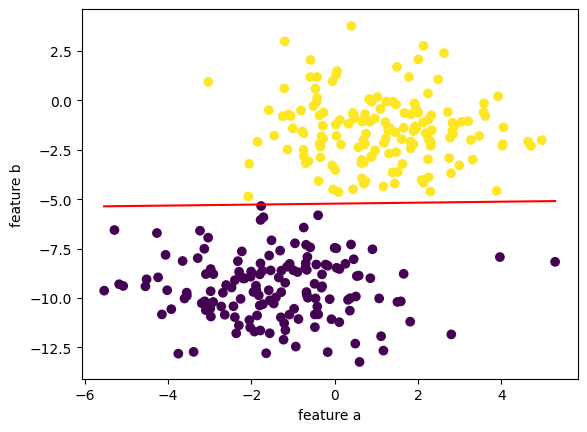

In [11]:
perceptron = Perceptron()
perceptron.fit(X,y)


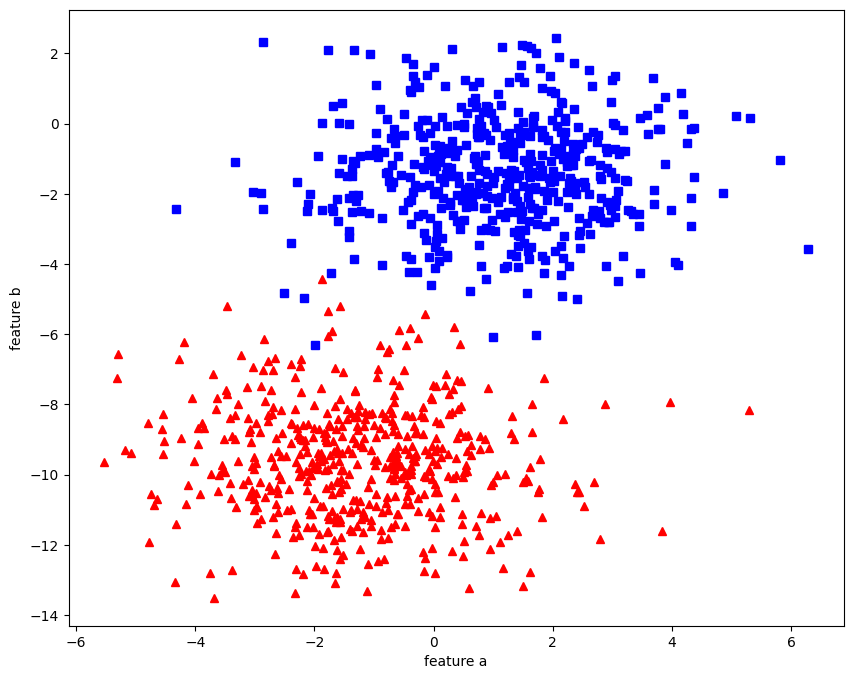

In [13]:
X_overlap,y_overlap = datasets.make_blobs(n_samples=1000,n_features=2,centers=2,cluster_std=1.6,random_state=2)
y_overlap[y_overlap==0] = -1
figure = plt.figure(figsize=(10,8))
#plot all the examples in the first cluster using a red triangle
plt.plot(X_overlap[:,0][y_overlap==-1],X_overlap[:,1][y_overlap==-1],"r^")
#plot all the examples in the secon cluster using blue squares
plt.plot(X_overlap[:,0][y_overlap==1],X_overlap[:,1][y_overlap==1],"bs")
#make x label for the x axis
plt.xlabel("feature a")
plt.ylabel("feature b")
plt.show()

terminated training after failing to converge in 500 epochs


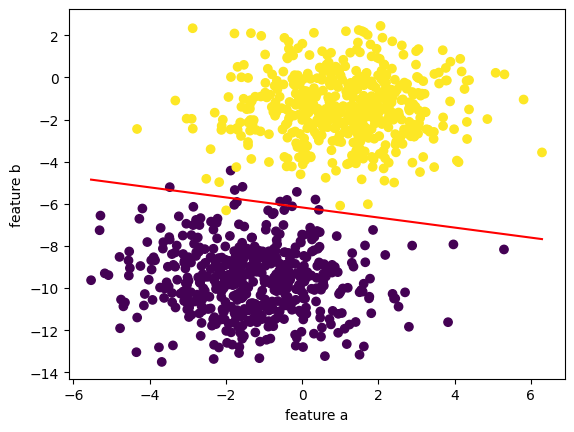

In [14]:
perceptron = Perceptron()
perceptron.fit(X_overlap,y_overlap)